# Data for MD simulation of polymer folding

In [1]:
import numpy as np
from polymer import *
import matplotlib.pyplot as plt
from ase import Atoms
from ase.io import write

#Global parameters
e_attract = 0.5
n_particles = 20  # Number of particles
box_size = 100  # Size of the cubic box
r0 = 1.0  # Equilibrium bond length
mass = 1.0  # Particle mass
sigma = 1.0  # LJ potential parameter
dt = 0.01  # Time step
total_steps = 10000  # Number of steps
rescale_interval = 100  # Steps between velocity rescaling


In [2]:
# Simulation 1: Varying temperature at e_rep = k = 1

temperatures = np.linspace(0.1, 1, 10)  # Temperatures
e_rep = 1 # Depth of repulsive LJ potential
k = 1   # Spring constant

Rg_values = []
Ree_values = []
potential_energies = []
pe_harm = []
pe_attract = []
pe_repulse = []
temp_positions = []


for T in temperatures:
    # Set target temperature
    target_temperature = T
    
    # Initialize positions and velocities
    positions = initialize_chain(n_particles, box_size, r0)
    velocities = initialize_velocities(n_particles, target_temperature, mass)
    trjs = []
    # Simulation loop
    for step in range(total_steps):
        # Compute forces
        forces_harmonic = compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = compute_lennard_jones_forces(positions, e_rep, sigma, box_size, 'repulsive')
        forces_attractive = compute_lennard_jones_forces(positions, e_attract, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive
        
        # Integrate equations of motion
        positions, velocities, total_forces = velocity_verlet(positions, velocities, total_forces, dt, mass, k, e_rep)
        
        # Apply thermostat
        if step % rescale_interval == 0:
            velocities = rescale_velocities(velocities, target_temperature, mass)
        if not (step + 1) % 20:
            trjs.append(Atoms(f"H{20}", positions=positions, velocities=velocities, cell=[box_size, box_size, box_size]))
    
    # write(f"T={T:.2f}_K={k:.2f}_e={e:.2f}.extxyz", trjs, format="extxyz")
    write(f"T={T:.2f}.extxyz", trjs, format="extxyz")
    pe_harmonic = calc_harmonic_potential_energy(positions, k)
    pe_attractive = calc_LJ_potential_energy(positions, e_attract, "attractive")
    pe_repulsive = calc_LJ_potential_energy(positions, e_rep, "repulsive")
    Rg = calc_gyration_radius(positions)
    Ree = calc_end_to_end_dist(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    pe_harm.append(pe_harmonic)
    pe_attract.append(pe_attractive)
    pe_repulse.append(pe_repulsive)
    temp_positions.append(positions)
    potential_energies.append(pe_harmonic + pe_attractive + pe_repulsive)


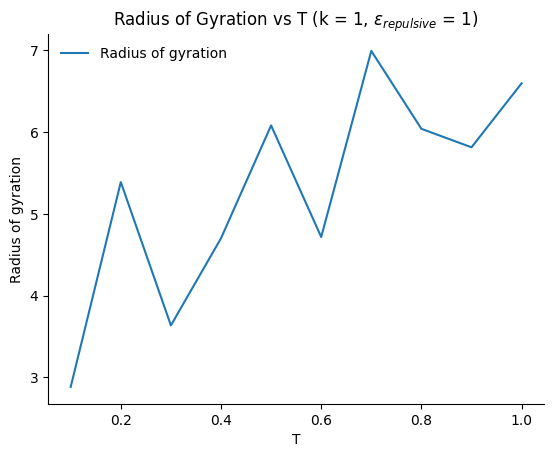

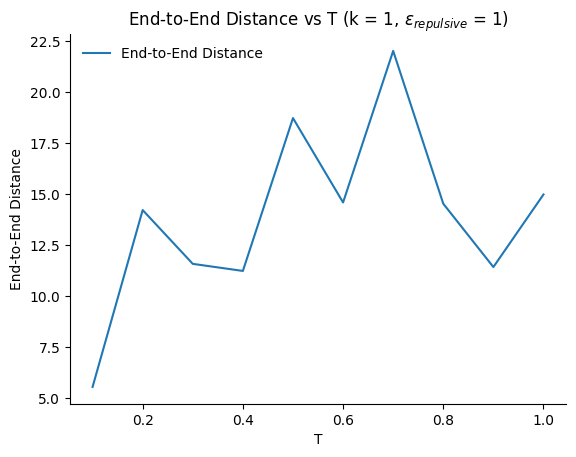

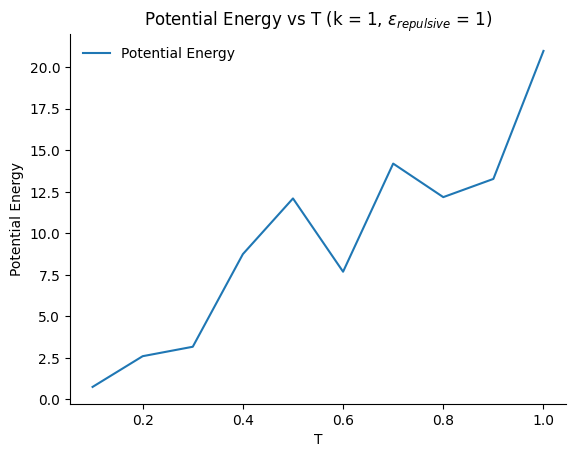

In [17]:
# Plotting
plt.figure()
plt.plot(temperatures, Rg_values, label='Radius of gyration')
plt.xlabel('T')
plt.ylabel('Radius of gyration')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.67, linestyle="--", color='black', label="T = 0.67")
plt.title(r'Radius of Gyration vs T (k = 1, $\epsilon_{repulsive}$ = 1)')
plt.legend(frameon=False)
plt.savefig("Sim1_ROG_vs_T.png")
plt.show()

plt.figure()
plt.plot(temperatures, Ree_values, label='End-to-End Distance')
plt.xlabel('T')
plt.ylabel('End-to-End Distance')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.67, linestyle="--", color='black', label="T = 0.67")
plt.title(r'End-to-End Distance vs T (k = 1, $\epsilon_{repulsive}$ = 1)')
plt.legend(frameon=False)
plt.savefig("Sim1_EED_vs_T.png")
plt.show()

plt.figure()
plt.plot(temperatures, potential_energies, label='Potential Energy')
plt.xlabel('T')
plt.ylabel('Potential Energy')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
plt.title(r'Potential Energy vs T (k = 1, $\epsilon_{repulsive}$ = 1)')
plt.legend(frameon=False)
plt.savefig("Sim1_PE_vs_T.png")
plt.show()

# plt.figure()
# plt.plot(temperatures, pe_harm, label='Harmonic')
# plt.xlabel('Temperature')
# plt.ylabel('Potential Energy')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# # plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
# plt.title('Harmonic vs Temperature')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(temperatures, pe_attract, label='Attractive')
# plt.xlabel('Temperature')
# plt.ylabel('Potential Energy')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# # plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
# plt.title('Attractive vs Temperature')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(temperatures, pe_repulse, label='Repulsive')
# plt.xlabel('Temperature')
# plt.ylabel('Potential Energy')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# # plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
# plt.title('Repulsive vs Temperature')
# plt.legend()
# plt.show()

In [8]:
# Simulation 2: Varying e_rep at k = 1, T = 0.1

target_temperature = 0.1 # Temperature
e_rep = np.linspace(0, 2, 10) # Depth of repulsive LJ potential
k = 1 # Spring constant

Rg_values = []
Ree_values = []
potential_energies = []
pe_harm = []
pe_attract = []
pe_repulse = []
temp_positions = []


for e in e_rep:
    
    # Initialize positions and velocities
    positions = initialize_chain(n_particles, box_size, r0)
    velocities = initialize_velocities(n_particles, target_temperature, mass)
    trjs = []
    # Simulation loop
    for step in range(total_steps):
        # Compute forces
        forces_harmonic = compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = compute_lennard_jones_forces(positions, e, sigma, box_size, 'repulsive')
        forces_attractive = compute_lennard_jones_forces(positions, e_attract, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive
        
        # Integrate equations of motion
        positions, velocities, total_forces = velocity_verlet(positions, velocities, total_forces, dt, mass, k, e)
        
        # Apply thermostat
        # if step % rescale_interval == 0:
        velocities = rescale_velocities(velocities, target_temperature, mass)
        # if not (step + 1) % 20:
            # trjs.append(Atoms(f"H{20}", positions=positions, velocities=velocities, cell=[box_size, box_size, box_size]))
    
    # write(f"T={T:.2f}_K={k:.2f}_e={e:.2f}.extxyz", trjs, format="extxyz")
    #write(f"e={e:.2f}.extxyz", trjs, format="extxyz")
    pe_harmonic = calc_harmonic_potential_energy(positions, k)
    pe_attractive = calc_LJ_potential_energy(positions, e_attract, "attractive")
    pe_repulsive = calc_LJ_potential_energy(positions, e, "repulsive")
    # print(pe_harmonic)
    # print(pe_attractive)
    # print(pe_repulsive)
    Rg = calc_gyration_radius(positions)
    Ree = calc_end_to_end_dist(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    # pe_harm.append(pe_harmonic)
    # pe_attract.append(pe_attractive)
    # pe_repulse.append(pe_repulsive)
    temp_positions.append(positions)
    combined_potential_energy = pe_harmonic + pe_attractive + pe_repulsive
    # print(combined_potential_energy)
    potential_energies.append(combined_potential_energy)


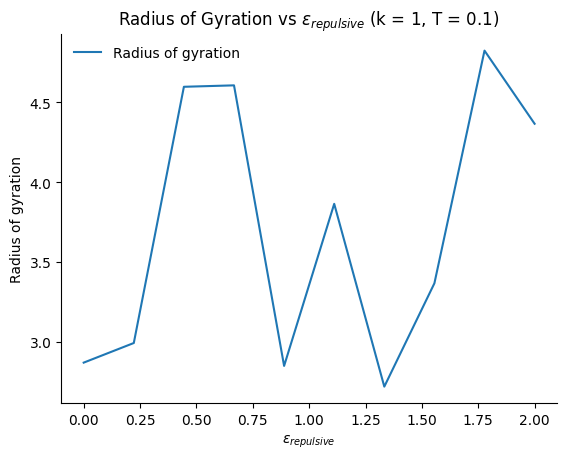

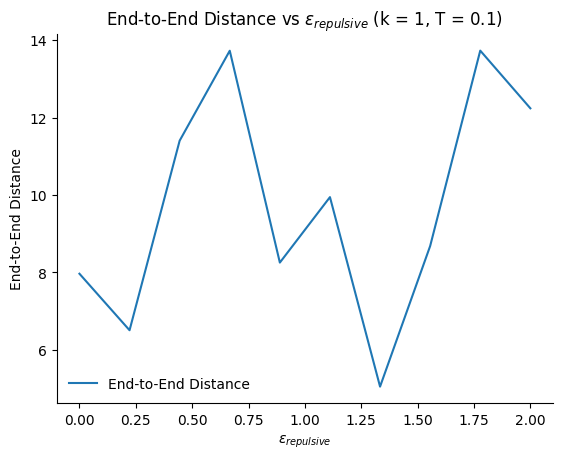

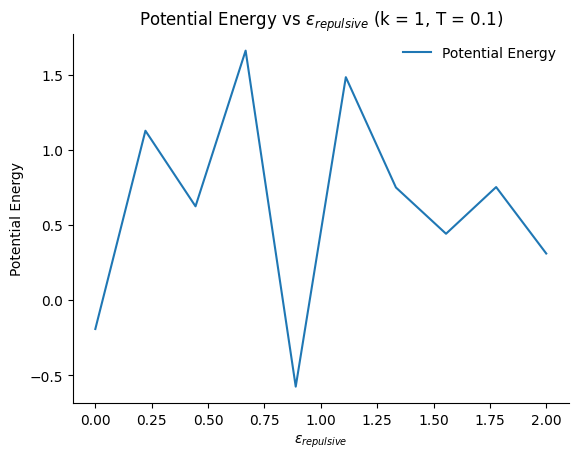

In [9]:
# Plotting
plt.figure()
plt.plot(e_rep, Rg_values, label='Radius of gyration')
plt.xlabel(r'$\epsilon_{repulsive}$')
plt.ylabel('Radius of gyration')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.67, linestyle="--", color='black', label="T = 0.67")
plt.title(r'Radius of Gyration vs $\epsilon_{repulsive}$ (k = 1, T = 0.1)')
plt.legend(frameon=False)
plt.savefig("Sim2_ROG_vs_e.png")
plt.show()

plt.figure()
plt.plot(e_rep, Ree_values, label='End-to-End Distance')
plt.xlabel(r'$\epsilon_{repulsive}$')
plt.ylabel('End-to-End Distance')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.67, linestyle="--", color='black', label="T = 0.67")
plt.title(r'End-to-End Distance vs $\epsilon_{repulsive}$ (k = 1, T = 0.1)')
plt.legend(frameon=False)
plt.savefig("Sim2_EED_vs_e.png")
plt.show()

plt.figure()
plt.plot(e_rep, potential_energies, label='Potential Energy')
plt.xlabel(r'$\epsilon_{repulsive}$')
plt.ylabel('Potential Energy')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
plt.title(r'Potential Energy vs $\epsilon_{repulsive}$ (k = 1, T = 0.1)')
plt.legend(frameon=False)
plt.savefig("Sim2_PE_vs_e.png")
plt.show()

In [6]:
# Simulation 3: Varying k at e_rep = 1, T = 0.1

target_temperature = 0.1 # Temperature
e_rep = 1 # Depth of repulsive LJ potential
k_ls = np.linspace(0, 2, 10) # Spring constant

Rg_values = []
Ree_values = []
potential_energies = []
pe_harm = []
pe_attract = []
pe_repulse = []
temp_positions = []


for k in k_ls:
    
    # Initialize positions and velocities
    positions = initialize_chain(n_particles, box_size, r0)
    velocities = initialize_velocities(n_particles, target_temperature, mass)
    trjs = []
    # Simulation loop
    for step in range(total_steps):
        # Compute forces
        forces_harmonic = compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = compute_lennard_jones_forces(positions, e_rep, sigma, box_size, 'repulsive')
        forces_attractive = compute_lennard_jones_forces(positions, e_attract, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive
        
        # Integrate equations of motion
        positions, velocities, total_forces = velocity_verlet(positions, velocities, total_forces, dt, mass, k, e)
        
        # Apply thermostat
        if step % rescale_interval == 0:
            velocities = rescale_velocities(velocities, target_temperature, mass)
        if not (step + 1) % 20:
            trjs.append(Atoms(f"H{20}", positions=positions, velocities=velocities, cell=[box_size, box_size, box_size]))
    
    # write(f"T={T:.2f}_K={k:.2f}_e={e:.2f}.extxyz", trjs, format="extxyz")
    write(f"k={k:.2f}.extxyz", trjs, format="extxyz")
    pe_harmonic = calc_harmonic_potential_energy(positions, k)
    pe_attractive = calc_LJ_potential_energy(positions, e_attract, "attractive")
    pe_repulsive = calc_LJ_potential_energy(positions, e_rep, "repulsive")
    # print(pe_harmonic)
    # print(pe_attractive)
    # print(pe_repulsive)
    Rg = calc_gyration_radius(positions)
    Ree = calc_end_to_end_dist(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    # pe_harm.append(pe_harmonic)
    # pe_attract.append(pe_attractive)
    # pe_repulse.append(pe_repulsive)
    temp_positions.append(positions)
    combined_potential_energy = pe_harmonic + pe_attractive + pe_repulsive
    # print(combined_potential_energy)
    potential_energies.append(combined_potential_energy)


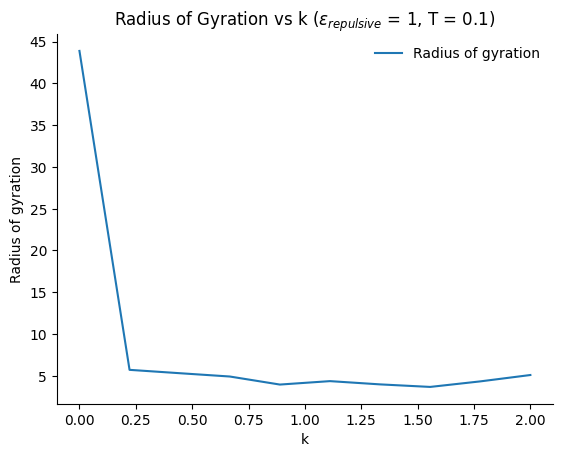

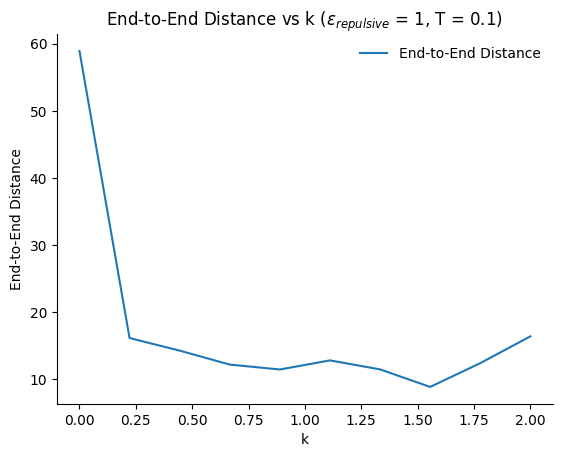

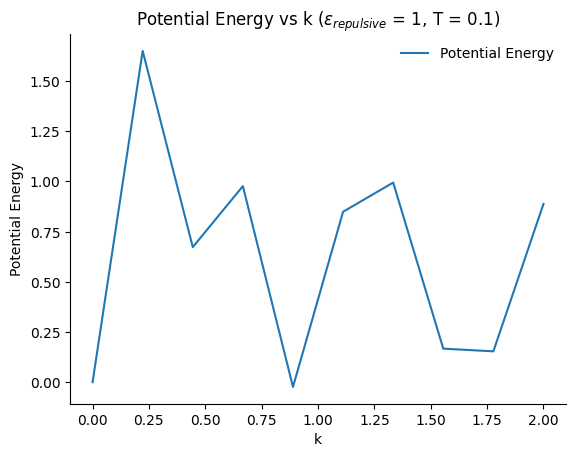

In [7]:
# Plotting
plt.figure()
plt.plot(k_ls, Rg_values, label='Radius of gyration')
plt.xlabel(r'k')
plt.ylabel('Radius of gyration')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.67, linestyle="--", color='black', label="T = 0.67")
plt.title(r'Radius of Gyration vs k ($\epsilon_{repulsive}$ = 1, T = 0.1)')
plt.legend(frameon=False)
plt.savefig("Sim3_ROG_vs_k.png")
plt.show()

plt.figure()
plt.plot(k_ls, Ree_values, label='End-to-End Distance')
plt.xlabel(r'k')
plt.ylabel('End-to-End Distance')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.67, linestyle="--", color='black', label="T = 0.67")
plt.title(r'End-to-End Distance vs k ($\epsilon_{repulsive}$ = 1, T = 0.1)')
plt.legend(frameon=False)
plt.savefig("Sim3_EED_vs_k.png")
plt.show()

plt.figure()
plt.plot(k_ls, potential_energies, label='Potential Energy')
plt.xlabel(r'k')
plt.ylabel('Potential Energy')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
plt.title(r'Potential Energy vs k ($\epsilon_{repulsive}$ = 1, T = 0.1)')
plt.legend(frameon=False)
plt.savefig("Sim3_PE_vs_k.png")
plt.show()